In [6]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
colors=['red','blue','green','yellow','purple','orange','brown','pink']
names=['BoolSat','BWT','Grover','HHL','Shor','Sqrt','StateVec','VQE']
marks=['o','s','D','P','X','*','+','x']
# voqc
n1=pd.read_csv('../results/POAC_new/n1.csv')
n2=pd.read_csv('../results/POAC_new/n2.csv')
n4=pd.read_csv('../results/POAC_new/n4.csv')
n8=pd.read_csv('../results/POAC_new/n8.csv')
n16=pd.read_csv('../results/POAC_new/n16.csv')
n32=pd.read_csv('../results/POAC_new/n32.csv')
n64=pd.read_csv('../results/POAC_new/n64.csv')
omega=pd.read_csv('../results/POAC_new/omega.csv')
# n64=pd.read_csv('../results/POAC_new/layer40.csv')
oac=pd.read_csv('../oac_results.csv')
n1_wannabe=pd.read_csv('../results/POAC_400/n1_wannabe.csv')
n128=pd.read_csv('../results/POAC_new/n128.csv')
quartz_gate=pd.read_csv('../results/POAC_new/quartz_gate.csv')
quartz_mixed=pd.read_csv('../results/POAC_new/quartz_mixed.csv')
voqc=pd.read_csv('../voqc_results.csv')
n_qubits=[28,30,32,34,17,21,25,29,9,11,13,15,7,9,11,13,10,12,14,16,42,48,54,60,5,6,7,8,18,22,26,30]

In [62]:
#keys of n1
print(n1.keys())


Index(['config', 'gates_before_optimization', 'depth_before_optimization',
       'gates_after_optimization', 'depth_after_optimization', 'n_rounds',
       'time', 'oracle_time', 'n_seams_total'],
      dtype='object')


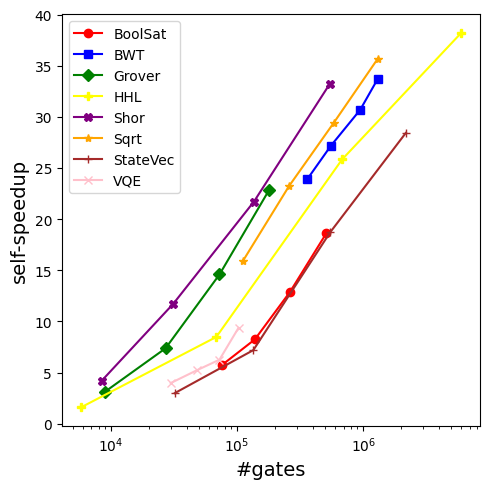

In [8]:
# get the "time" column of n1
time_n1=n1['time']
# get the "time" column of n2
time_n64=n64['time']
n_gates=n1['gates_before_optimization']
fig, ax = plt.subplots(figsize=(5,5))
for i in range(8):
    # draw the speedup vs n_gates, four a group
    ax.plot(n_gates[4*i:4*i+4], time_n1[4*i:4*i+4]/time_n64[4*i:4*i+4],color=colors[i],label=names[i],marker=marks[i])
ax.set_xscale('log')
ax.legend()
#larger font
ax.set_xlabel('#gates',fontsize=14)
ax.set_ylabel('self-speedup',fontsize=14)
plt.tight_layout()
plt.savefig('speedup_vs_n_gates.pdf')

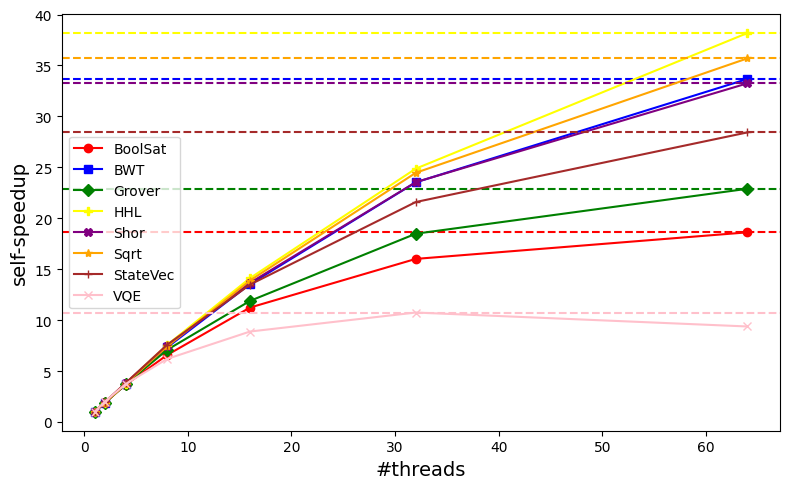

In [11]:
n_threads=np.array([1,2,4,8,16,32,64])
fig, ax = plt.subplots(figsize=(8,5))
for i in range(8):
    data=[]
    for results in [n1,n2,n4,n8,n16,n32,n64]:
        data.append(np.mean(results['time'][4*i+3:4*i+4]))
    data=data[0]/data
    ax.plot(n_threads,np.array(data,dtype=np.float32),color=colors[i],label=names[i],marker=marks[i])
    # add a horizontal line ax max y value
    ax.axhline(y=np.max(np.array(data,dtype=np.float32)),color=colors[i],linestyle='--')
ax.legend()
#larger font
ax.set_xlabel('#threads',fontsize=14)
ax.set_ylabel('self-speedup',fontsize=14)
plt.tight_layout()
plt.savefig('speedup_vs_n_threads.pdf')


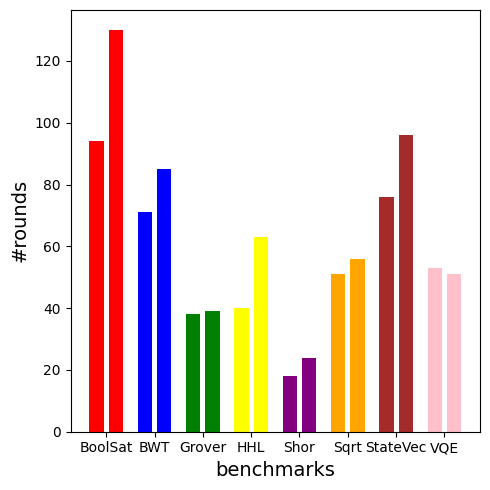

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
for i in range(8):

    ax.bar(i-0.2,float(n1["n_rounds"][i*4+0]),0.3,color=colors[i])
    ax.bar(i+0.2,float(n1["n_rounds"][i*4+3]),0.3,color=colors[i])
# ax.legend(loc='upper left',ncol=4)
ax.set_xticks(range(8))
#larger font
ax.set_xlabel('benchmarks',fontsize=14)
ax.set_ylabel('#rounds',fontsize=14)
ax.set_xticklabels(names,fontsize=10)
plt.tight_layout()
plt.savefig('n_rounds.pdf')

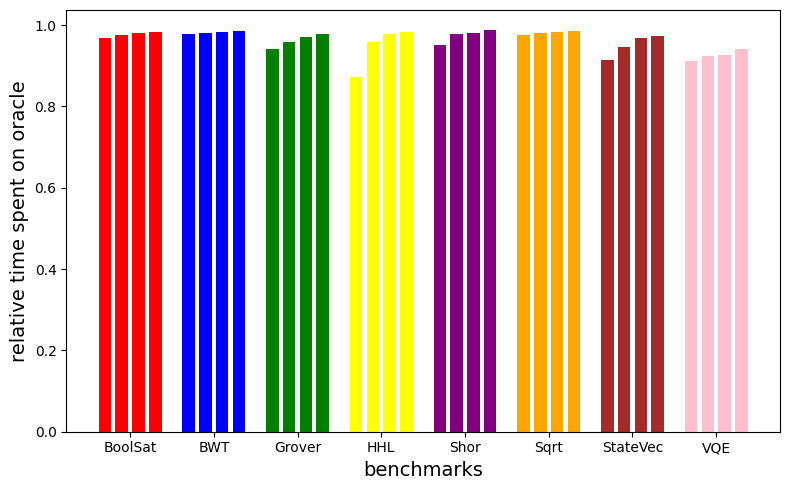

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
for i in range(8):
    for j in range(4):
        ax.bar(i-0.3+0.2*j,float(n1["oracle_time"][i*4+j])/float(n1["time"][i*4+j]),0.15,color=colors[i])

ax.set_xticks(range(8))
#larger font
ax.set_xlabel('benchmarks',fontsize=14)
ax.set_ylabel('relative time spent on oracle',fontsize=14)
ax.set_xticklabels(names,fontsize=10)
plt.tight_layout()
plt.savefig('oracle_time.pdf')


(32,)
1.0700926320956325 -9.07214148344993


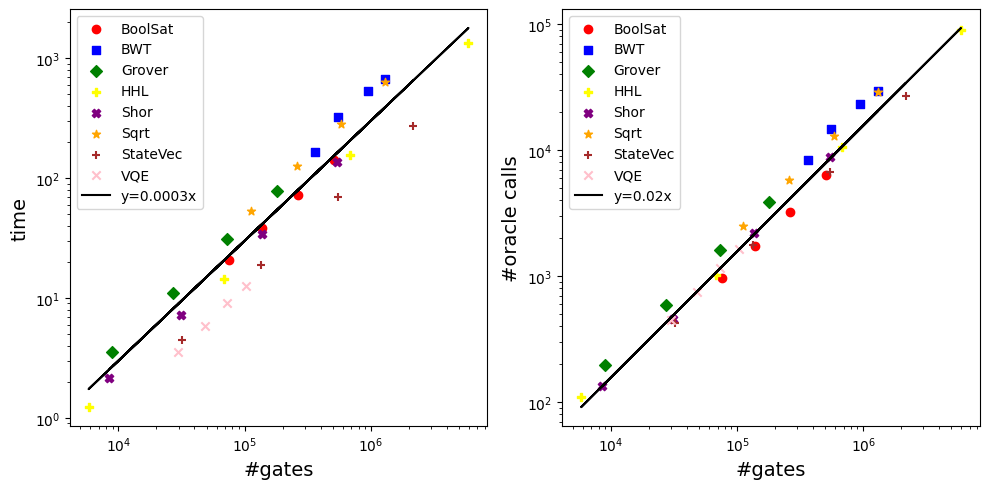

In [15]:
xs=[]
ys1=[]
ys2=[]
fig, ax = plt.subplots(1,2,figsize=(10,5))
for i in range(8):
    xs.append([])
    ys1.append([])
    ys2.append([])
    for j in range(4):
        xs[i].append(float(n1["gates_before_optimization"][i*4+j]))
        ys1[i].append(float(n1["time"][i*4+j]))
        ys2[i].append(float(n1["n_seams_total"][i*4+j]))
    ax[0].scatter(xs[i], ys1[i],color=colors[i],label=names[i],marker=marks[i])
    ax[1].scatter(xs[i], ys2[i],color=colors[i],label=names[i],marker=marks[i])
xs=np.array(xs).flatten()
ys1=np.array(ys1).flatten()
ys2=np.array(ys2).flatten()
print(xs.shape)
# fit a linear line
slope, intercept = np.polyfit(np.log(xs), np.log(ys1), 1)
print(slope, intercept)
ax[0].plot(xs, 0.0003*xs,color='black',label=f'y={0.0003:.4f}x')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend()
#larger font
ax[0].set_ylabel('time',fontsize=14)
ax[0].set_xlabel('#gates',fontsize=14)

slope, intercept = np.polyfit(np.log(xs), np.log(ys2), 1)
ax[1].plot(xs, np.exp(intercept)*xs,color='black',label=f'y={np.exp(intercept):.2f}x')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].legend()
#larger font
ax[1].set_xlabel('#gates',fontsize=14)
ax[1].set_ylabel('#oracle calls',fontsize=14)
plt.tight_layout()
plt.savefig('work_vs_gates.pdf')

In [68]:
# main results
result = ""
gate_reduction_voqc=1-voqc["gates"]/n1["gates_before_optimization"]
gate_reduction_poac=1-n64["gates_after_optimization"]/n64["gates_before_optimization"]
speedup=voqc["time"]/n64["time"]
gate=n1["gates_before_optimization"]
for i in range(8):
    result+=r"\multirow{4}{*}{"+f"{names[i]}"+"}"
    for j in range(4):
        idx=i*4+j

        if gate_reduction_voqc[idx] >0:
            result+=f"& {n_qubits[idx]} & {gate[idx]} & {100*gate_reduction_voqc[idx]:.1f}\\% & {voqc["time"][idx]:.1f} & {100*gate_reduction_poac[idx]:.1f}\\% & {n64["time"][idx]:.1f} & {speedup[idx]:.1f} \\\\\n"
        else:
            result+=f"& {n_qubits[idx]} & {gate[idx]} & N.A. & $\\geq${voqc["time"][idx]:.1f} & {100*gate_reduction_poac[idx]:.1f}\\% & {n64["time"][idx]:.1f} & $\\geq${speedup[idx]:.1f} \\\\\n"


    result+="\\midrule\n"
result+=f"avg&&&{100*np.mean(gate_reduction_voqc):.2f}\\%&&{100*np.mean(gate_reduction_poac):.2f}\\%&&{np.mean(speedup):.2f}\\\\"
result+=r"""\bottomrule"""
print(result)

\multirow{4}{*}{BoolSat}& 28 & 75818 & 83.2\% & 145.5 & 83.7\% & 3.6 & 40.2 \\
& 30 & 138443 & 83.3\% & 722.5 & 83.6\% & 4.6 & 155.8 \\
& 32 & 262724 & 83.3\% & 3055.0 & 83.4\% & 5.6 & 544.2 \\
& 34 & 510137 & 83.3\% & 15952.6 & 83.3\% & 7.6 & 2091.1 \\
\midrule
\multirow{4}{*}{BWT}& 17 & 361603 & 44.7\% & 12165.6 & 44.7\% & 6.9 & 1770.0 \\
& 21 & 553603 & 51.4\% & 32549.3 & 51.4\% & 12.0 & 2712.5 \\
& 25 & 946801 & N.A. & $\geq$86400.0 & 52.9\% & 17.2 & $\geq$5027.9 \\
& 29 & 1298801 & N.A. & $\geq$86400.0 & 53.9\% & 20.0 & $\geq$4326.3 \\
\midrule
\multirow{4}{*}{Grover}& 9 & 8968 & 29.4\% & 5.8 & 29.3\% & 1.1 & 5.1 \\
& 11 & 27136 & 29.9\% & 63.8 & 29.6\% & 1.5 & 42.9 \\
& 13 & 72646 & 29.7\% & 565.3 & 29.3\% & 2.1 & 264.2 \\
& 15 & 180497 & 29.5\% & 3911.3 & 28.9\% & 3.4 & 1151.2 \\
\midrule
\multirow{4}{*}{HHL}& 7 & 5796 & 44.5\% & 0.3 & 58.9\% & 0.8 & 0.4 \\
& 9 & 68558 & 44.7\% & 151.1 & 59.5\% & 1.7 & 89.2 \\
& 11 & 680376 & 41.9\% & 33483.9 & 56.5\% & 6.0 & 5600.6 \\
& 13 & 59

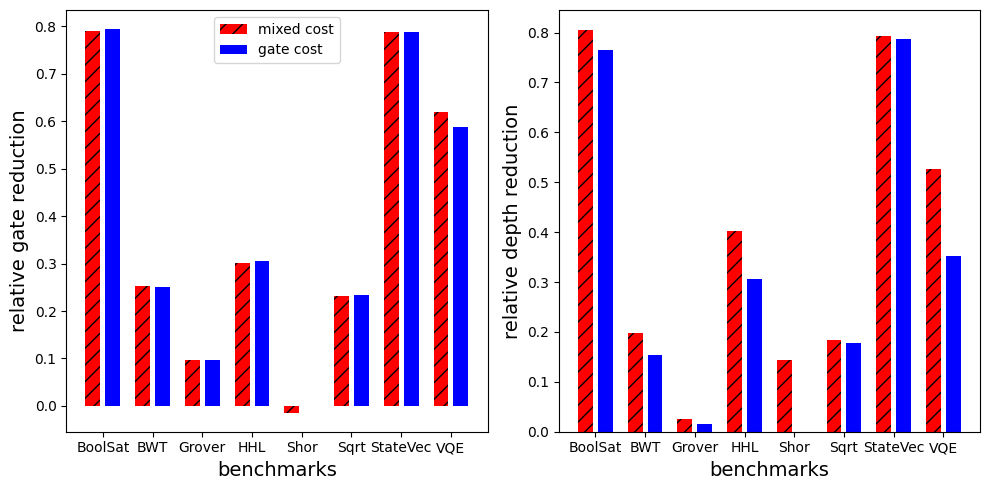

In [16]:
#quartz
gate_reduction_quartz_gate=1-quartz_gate["gates_after_optimization"]/quartz_gate["gates_before_optimization"]
gate_reduction_quartz_mixed=1-quartz_mixed["gates_after_optimization"]/quartz_mixed["gates_before_optimization"]
depth_reduction_quartz_gate=1-quartz_gate["depth_after_optimization"]/quartz_gate["depth_before_optimization"]
depth_reduction_quartz_mixed=1-quartz_mixed["depth_after_optimization"]/quartz_mixed["depth_before_optimization"]

fig, ax = plt.subplots(1,2,figsize=(10,5))
for i in range(8):
    #add some stripe
    ax[0].bar(i-0.2,np.mean(gate_reduction_quartz_mixed[4*i:4*i+4]),0.3,color=colors[0],hatch='//')
    ax[0].bar(i+0.2,np.mean(gate_reduction_quartz_gate[4*i:4*i+4]),0.3,color=colors[1])
    ax[1].bar(i-0.2,np.mean(depth_reduction_quartz_mixed[4*i:4*i+4]),0.3,color=colors[0],hatch='//')
    ax[1].bar(i+0.2,np.mean(depth_reduction_quartz_gate[4*i:4*i+4]),0.3,color=colors[1])
# ax.legend(loc='upper left',ncol=4)
# add a legend showing what color means
ax[0].legend(['mixed cost','gate cost'],loc='upper center')

ax[0].set_xticks(range(8))
#larger font
ax[0].set_xlabel('benchmarks',fontsize=14)
ax[0].set_ylabel('relative gate reduction',fontsize=14)
ax[0].set_xticklabels(names,fontsize=10)
ax[1].set_xticks(range(8))
ax[1].set_xlabel('benchmarks',fontsize=14)
ax[1].set_ylabel('relative depth reduction',fontsize=14)
ax[1].set_xticklabels(names,fontsize=10)
plt.tight_layout()
plt.savefig('quartz.pdf')

In [70]:
# effect of local optimization
result = ""
voqc_time=voqc["time"]
poac_time=n1["time"]
speedup=voqc_time/poac_time
gate=n1["gates_before_optimization"]
for i in range(8):
    result+=r"\multirow{4}{*}{"+f"{names[i]}"+"}"
    for j in range(4):
        idx=i*4+j
        # print speed up as percentage
        result+=f"& {n_qubits[idx]} & {voqc_time[idx]:.2f} & {poac_time[idx]:.2f} & {speedup[idx]:.1f} \\\\\n"
    result+="\\midrule\n"
    #add avg
result+=f"avg & & & & {np.mean(speedup):.1f} \\\\\n"
result+=r"""\bottomrule"""
print(result)

\multirow{4}{*}{BoolSat}& 28 & 145.47 & 20.76 & 7.0 \\
& 30 & 722.50 & 38.25 & 18.9 \\
& 32 & 3055.01 & 72.32 & 42.2 \\
& 34 & 15952.59 & 142.03 & 112.3 \\
\midrule
\multirow{4}{*}{BWT}& 17 & 12165.58 & 164.48 & 74.0 \\
& 21 & 32549.34 & 325.93 & 99.9 \\
& 25 & 86400.00 & 527.38 & 163.8 \\
& 29 & 86400.00 & 672.45 & 128.5 \\
\midrule
\multirow{4}{*}{Grover}& 9 & 5.78 & 3.52 & 1.6 \\
& 11 & 63.76 & 10.97 & 5.8 \\
& 13 & 565.35 & 31.22 & 18.1 \\
& 15 & 3911.32 & 77.78 & 50.3 \\
\midrule
\multirow{4}{*}{HHL}& 7 & 0.32 & 1.23 & 0.3 \\
& 9 & 151.12 & 14.38 & 10.5 \\
& 11 & 33483.88 & 154.47 & 216.8 \\
& 13 & 86400.00 & 1338.62 & 64.5 \\
\midrule
\multirow{4}{*}{Shor}& 10 & 5.43 & 2.14 & 2.5 \\
& 12 & 106.58 & 7.20 & 14.8 \\
& 14 & 2276.87 & 34.07 & 66.8 \\
& 16 & 53486.13 & 135.62 & 394.4 \\
\midrule
\multirow{4}{*}{Sqrt}& 42 & 442.84 & 53.56 & 8.3 \\
& 48 & 3154.85 & 125.29 & 25.2 \\
& 54 & 17854.00 & 280.18 & 63.7 \\
& 60 & 86400.00 & 632.01 & 136.7 \\
\midrule
\multirow{4}{*}{StateVec}& 

In [2]:
# compare with oac
result = ""
oac_time=oac["time"]
poac_time=n1_wannabe["time"]
speedup=oac_time/poac_time
gate=n1["gates_before_optimization"]
gate_reduction_oac=1-oac["gate"]/gate
gate_reduction_poac=1-n1_wannabe["gates_after_optimization"]/gate
for i in range(8):
    result+=r"\multirow{4}{*}{"+f"{names[i]}"+"}"
    for j in range(4):
        idx=i*4+j
        # print speed up as percentage
        result+=f"& {n_qubits[idx]} & {oac_time[idx]:.2f} & {poac_time[idx]:.2f} & {100*gate_reduction_oac[idx]:.1f}\\% & {100*gate_reduction_poac[idx]:.1f}\\% \\\\\n"
    result+="\\midrule\n"
    #add avg
result+=f"avg & &{np.mean(oac_time):.2f} & {np.mean(poac_time):.2f} & {100*np.mean(gate_reduction_oac):.1f}\\% & {100*np.mean(gate_reduction_poac):.1f}\\% \\\\\n"
result+=r"""\bottomrule"""
print(result)

\multirow{4}{*}{BoolSat}& 28 & 51.68 & 44.32 & 83.8\% & 83.7\% \\
& 30 & 94.00 & 75.97 & 83.7\% & 83.6\% \\
& 32 & 260.95 & 151.01 & 83.5\% & 83.4\% \\
& 34 & 571.49 & 293.09 & 83.4\% & 83.4\% \\
\midrule
\multirow{4}{*}{BWT}& 17 & 734.48 & 298.10 & 45.1\% & 45.0\% \\
& 21 & 1392.15 & 577.99 & 52.2\% & 52.2\% \\
& 25 & 2398.93 & 1083.17 & 55.4\% & 55.2\% \\
& 29 & 4632.67 & 1684.60 & 56.5\% & 56.2\% \\
\midrule
\multirow{4}{*}{Grover}& 9 & 5.73 & 5.51 & 29.4\% & 29.4\% \\
& 11 & 23.54 & 20.13 & 30.0\% & 30.0\% \\
& 13 & 89.72 & 52.49 & 29.8\% & 29.8\% \\
& 15 & 311.93 & 152.74 & 29.6\% & 29.5\% \\
\midrule
\multirow{4}{*}{HHL}& 7 & 1.39 & 1.55 & 59.0\% & 58.9\% \\
& 9 & 29.47 & 27.82 & 59.5\% & 59.5\% \\
& 11 & 785.73 & 316.79 & 56.6\% & 56.6\% \\
& 13 & 17968.66 & 2692.69 & 56.1\% & 56.0\% \\
\midrule
\multirow{4}{*}{Shor}& 10 & 6.01 & 5.33 & 11.0\% & 11.0\% \\
& 12 & 25.41 & 14.48 & 3.2\% & 3.2\% \\
& 14 & 154.12 & 70.52 & 11.2\% & 11.2\% \\
& 16 & 968.38 & 274.75 & 11.2\% & 11.2\% \

[0.47563626 0.49681328 0.51196888 0.51752657 0.51807595]
[ 6.48487659  5.22671479  6.05839646  9.41983002 19.4220566 ]


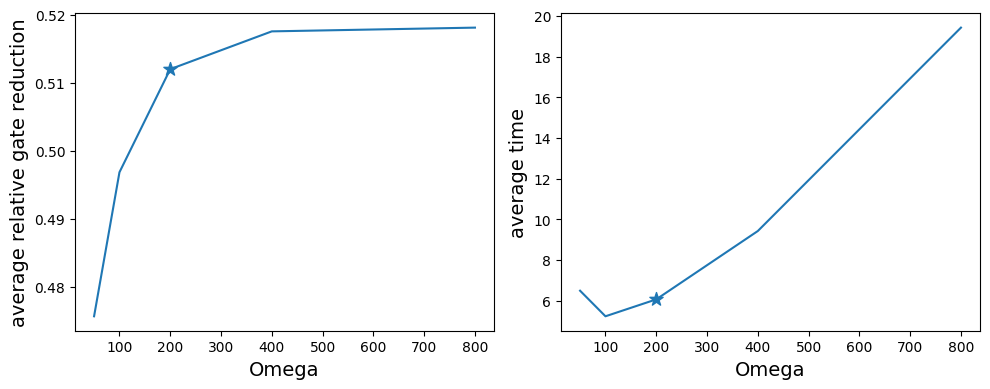

In [17]:
#quartz
omega_list=[50,100,200,400,800]
reduction_list=[0,0,0,0,0]
time_list=[0,0,0,0,0]
for i in range(32):
    for j in range(5):
        idx=i*5+j
        reduction_list[j]+=1-omega["gates_after_optimization"][idx]/omega["gates_before_optimization"][idx]
        time_list[j]+=omega["time"][idx]
reduction_list=np.array(reduction_list)/32
time_list=np.array(time_list)/32
print(reduction_list)
print(time_list)
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(omega_list, reduction_list,label='reduction')
ax[0].set_xlabel('Omega',fontsize=14)
ax[0].set_ylabel('average relative gate reduction',fontsize=14)
ax[1].plot(omega_list, time_list,label='time')
ax[1].set_xlabel('Omega',fontsize=14)
ax[1].set_ylabel('average time',fontsize=14)
#add a star at 200, larger size
#larger font
ax[0].scatter(200, reduction_list[2],marker='*',s=100)
ax[1].scatter(200, time_list[2] ,marker='*',s=100)
plt.tight_layout()
plt.savefig('omega.pdf')

In [73]:
omega.keys()

Index(['config', 'gates_before_optimization', 'depth_before_optimization',
       'gates_after_optimization', 'depth_after_optimization', 'n_rounds',
       'time', 'oracle_time', 'n_seams_total'],
      dtype='object')